In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
data_path = '/content/insurance2.csv'

In [69]:
data = pd.read_csv(data_path)

In [70]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [71]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [72]:
data.shape

(1338, 8)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


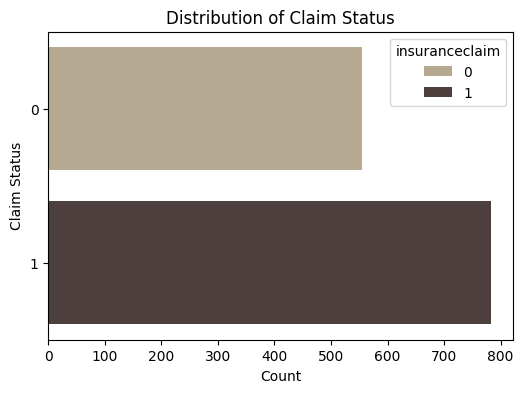

In [75]:
# Creating a count plot to visualize the distribution of claim status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, y='insuranceclaim', hue='insuranceclaim', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.title('Distribution of Claim Status')
plt.show()

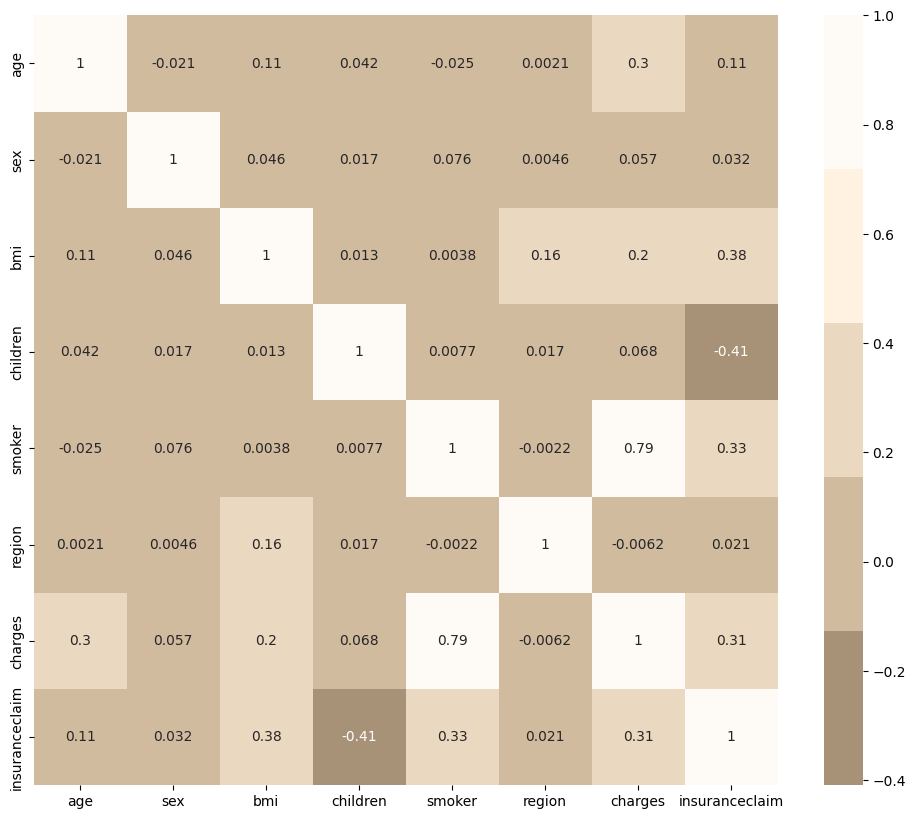

In [76]:
# Creating a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()

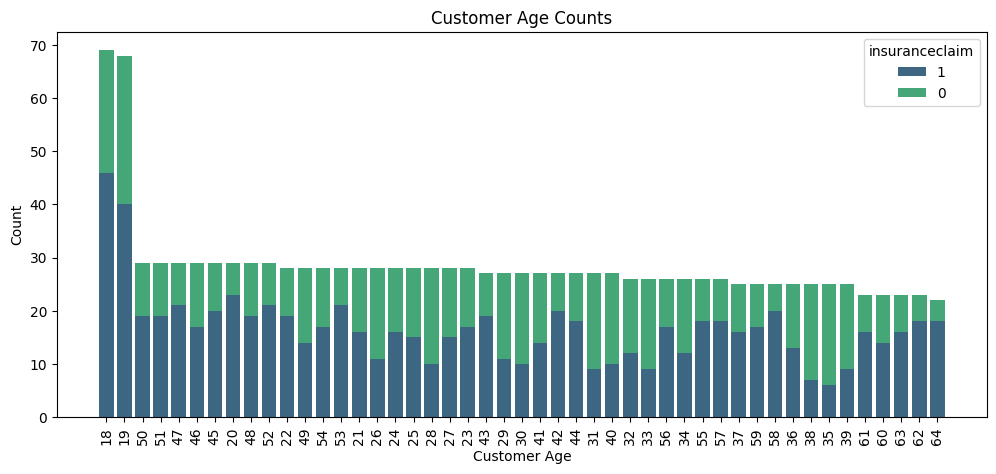

In [79]:
fig = plt.figure(figsize=(12, 5))
ax = sns.countplot(x="age", hue='insuranceclaim', palette='viridis', dodge=False, data=data,
                   order=data.age.value_counts(ascending=False).index,
                   hue_order=data.insuranceclaim.value_counts(ascending=False).index)
ax.set(xlabel="Customer Age", ylabel='Count', title='Customer Age Counts')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
plt.xticks(rotation=90)
plt.show()

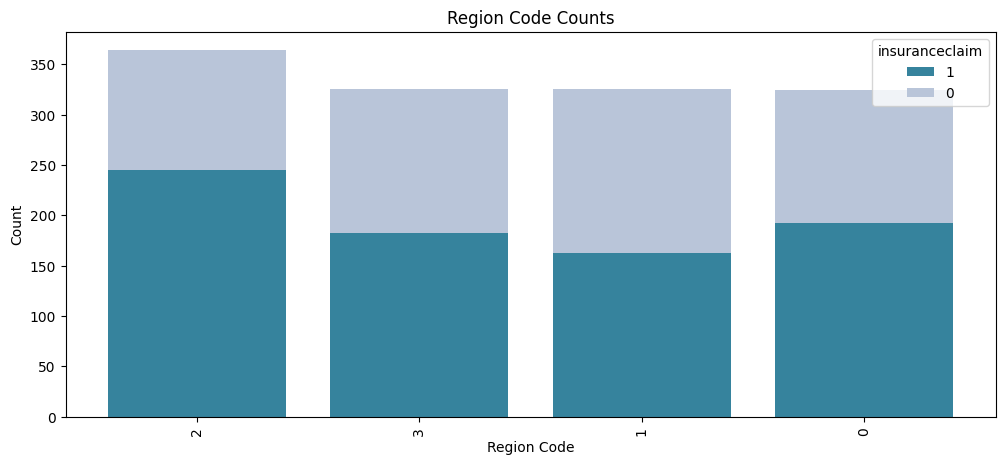

In [81]:
#sns.color_palette("vlag", as_cmap=True)

fig = plt.figure(figsize=(12, 5))
ax = sns.countplot(x="region", hue='insuranceclaim', dodge=False, data=data, palette="PuBuGn_r",
                   order=data.region.value_counts(ascending=False).index,
                   hue_order=data.insuranceclaim.value_counts(ascending=False).index)
ax.set(xlabel="Region Code", ylabel='Count', title='Region Code Counts')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
plt.xticks(rotation=90)
plt.show()

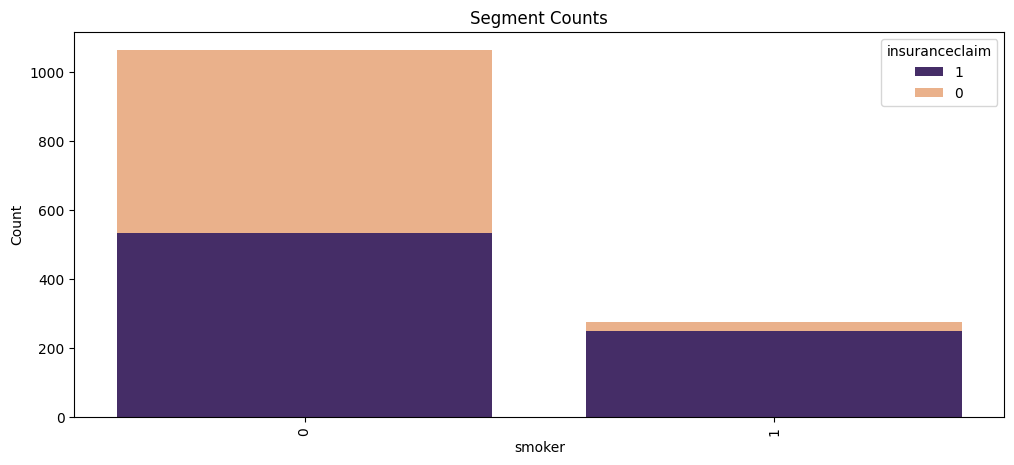

In [83]:
fig = plt.figure(figsize=(12, 5))
ax = sns.countplot(x="smoker", hue='insuranceclaim', palette=['#432371',"#FAAE7B"], dodge=False, data=data,
                   order=data.smoker.value_counts(ascending=False).index,
                   hue_order=data.insuranceclaim.value_counts(ascending=False).index)
ax.set(xlabel="smoker", ylabel='Count', title='Segment Counts')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
plt.xticks(rotation=90)
plt.show()

In [90]:
# Specifying a list of categorical columns
categorical_columns_temp = ['region', 'smoker']

<ipython-input-91-6be9d1be57e2>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#C69774'` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, hue=col, color='#C69774')
<ipython-input-91-6be9d1be57e2>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#C69774'` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, hue=col, color='#C69774')


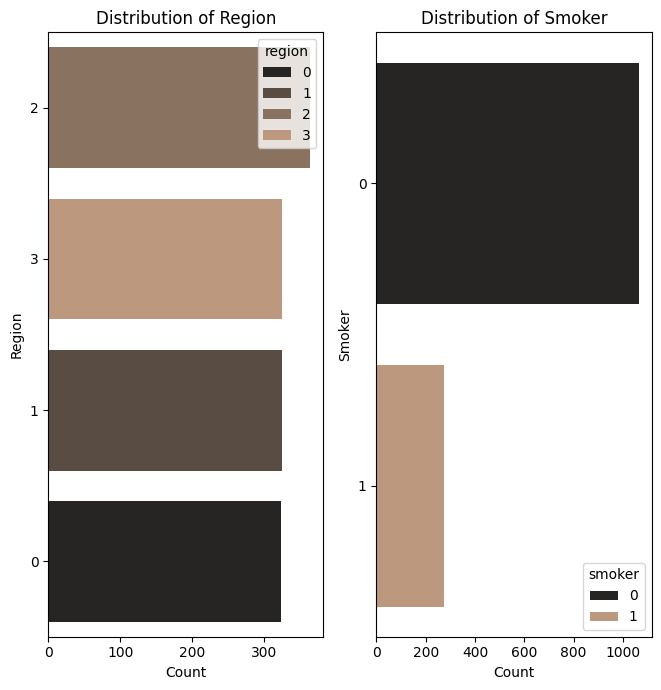

In [91]:
# Creating subplots to visualize the distribution of categorical columns
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns_temp, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, hue=col, color='#C69774')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

Univariant

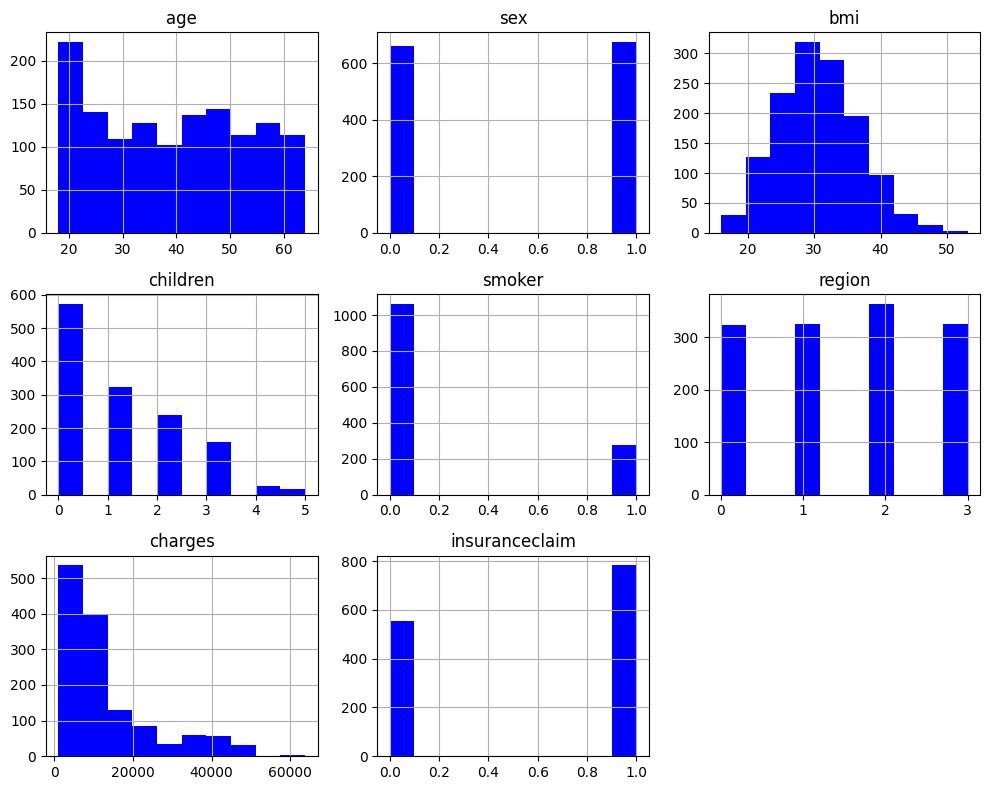

In [92]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

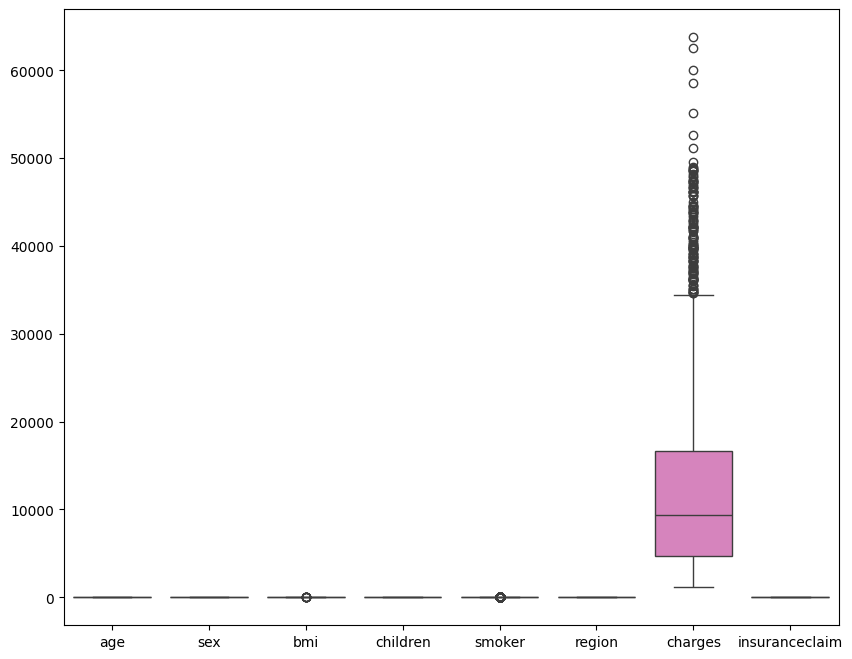

In [93]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

In [94]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

Multivariant

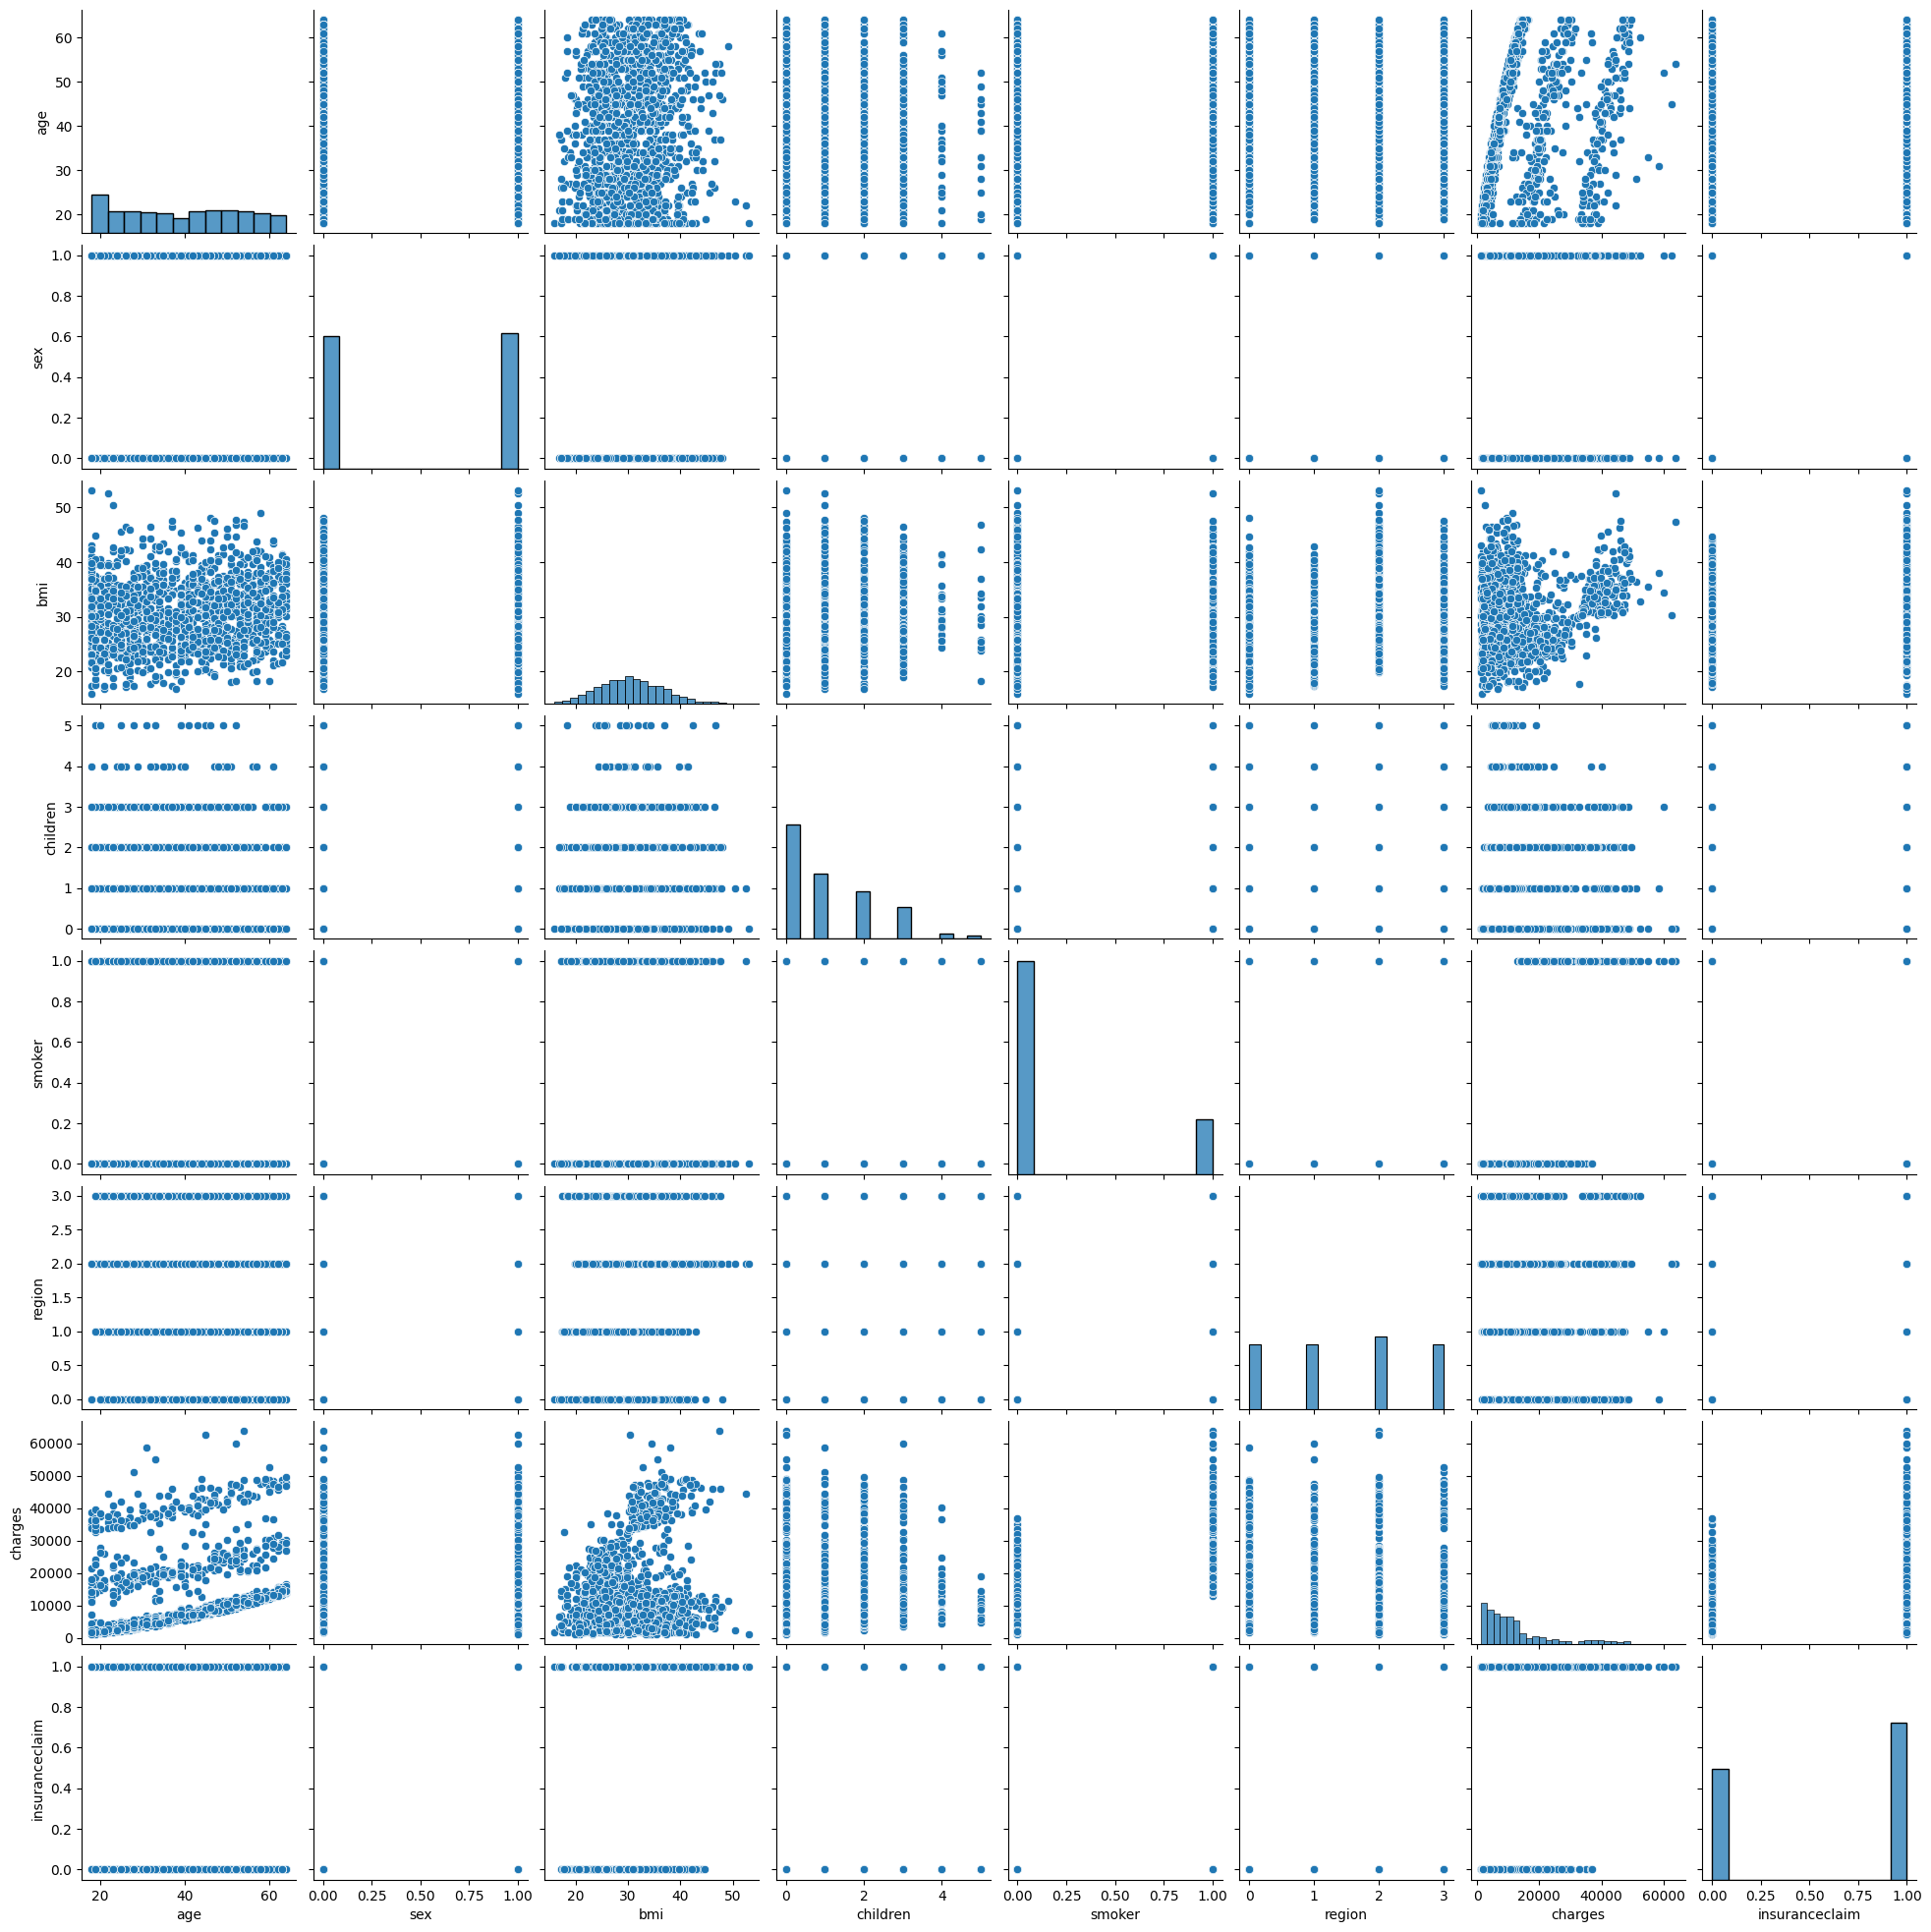

In [96]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

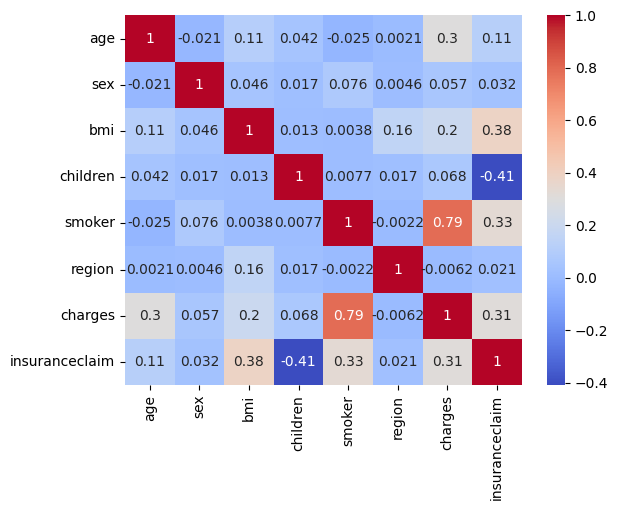

In [97]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [98]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 1


In [99]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0
insuranceclaim,0,0.0


In [100]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


In [101]:
X = data.drop('insuranceclaim', axis = 1)
y = data.insuranceclaim

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101,stratify=y)

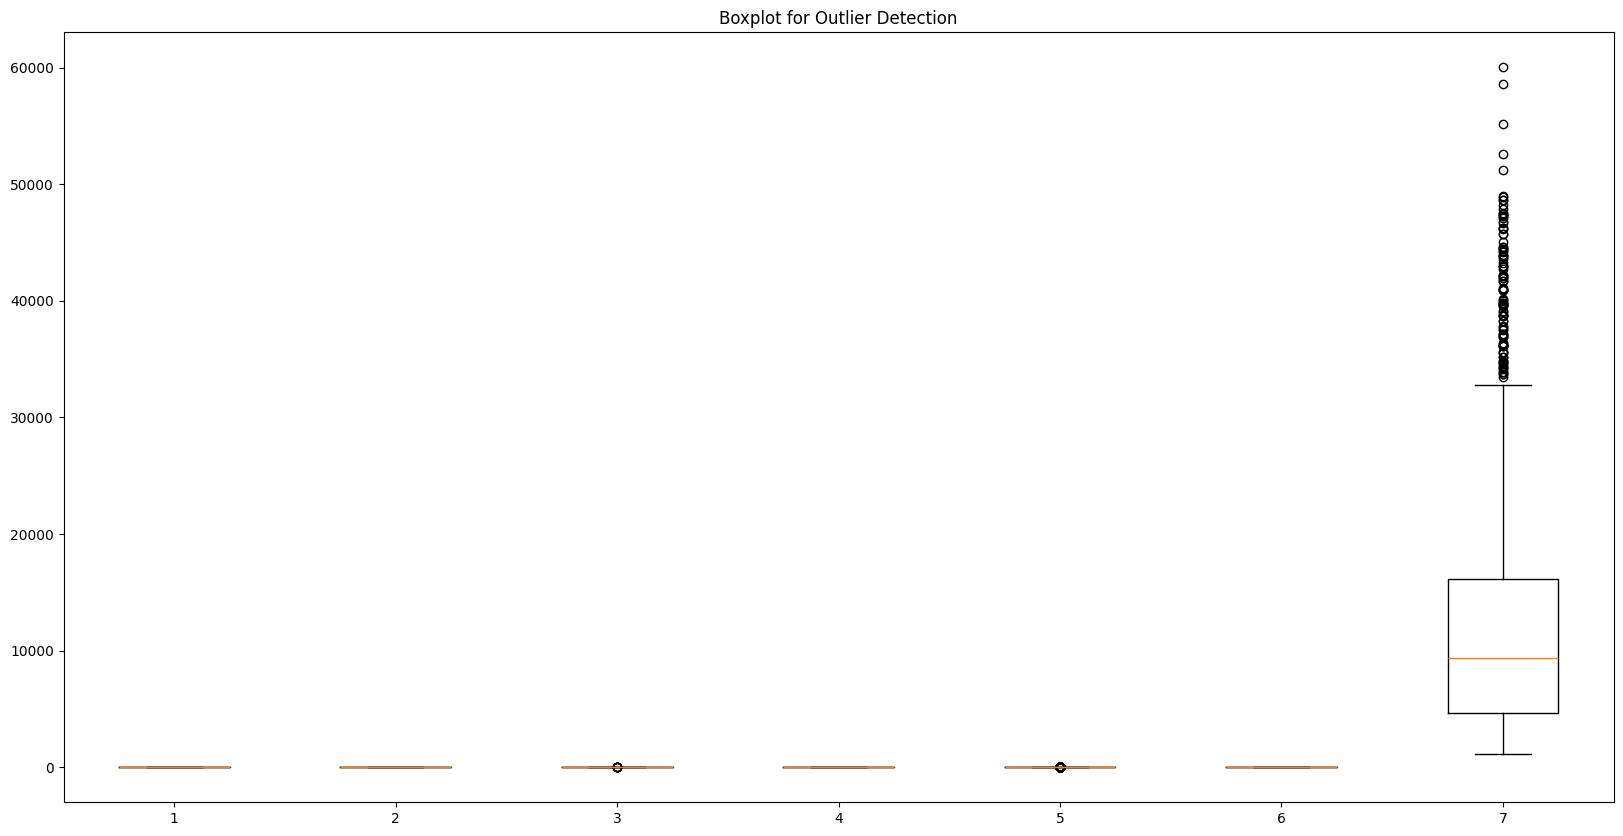

In [103]:
# Boxplot
plt.figure(figsize=(20, 10))
plt.boxplot(X_train)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [104]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
outliers = X_train[((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
      age  sex     bmi  children  smoker  region      charges
373    26    1  32.900         2       1       3  36085.21900
1118   33    1  35.750         1       1       2  38282.74950
500    29    1  34.400         0       1       3  36197.69900
664    64    0  22.990         0       1       2  27037.91410
327    45    1  36.480         2       1       1  42760.50220
...   ...  ...     ...       ...     ...     ...          ...
261    20    0  26.840         1       1       2  17085.26760
11     62    0  26.290         0       1       2  27808.72510
668    62    1  32.015         0       1       0  45710.20785
1184   23    0  28.490         1       1       2  18328.23810
617    49    1  25.600         2       1       3  23306.54700

[198 rows x 7 columns]


In [106]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)


In [109]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score

In [112]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

In [113]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('---------------------------------------------------')

Logistic Regression: F1 Score = 0.89
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       167
           1       0.90      0.91      0.90       235

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402

---------------------------------------------------
Random Forest: F1 Score = 0.95
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       167
           1       0.98      0.92      0.95       235

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402

---------------------------------------------------
Gradient Boosting: F1 Score = 0.96
Gradient Boosting Classification Report:
              prec

In [114]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [115]:
import pickle


In [116]:
# Save the model as a pickle file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(RandomForestClassifier, file)

print("Model saved successfully as 'random_forest_model.pkl'")

Model saved successfully as 'random_forest_model.pkl'
